# Policy And Value Iteration for FrozenLake-v0
Select problems from CMU's Deep RL HW1: https://katefvision.github.io/10703_hw1.pdf

In [40]:
import gym
import numpy as np
import seaborn as sns
import time 

# To display seaborn heatmaps
import matplotlib.pyplot as plt
%matplotlib inline

# So I can use the code that I wrote
%run rl.py lake_envs.py

**Policy Iteration - Deterministic 8x8 Frozen Lake**  

In [41]:
#a - Policy Iteration 
gamma = 0.9 
max_iterations = 1000
tolerance = 1e-3 

env = gym.make('Deterministic-8x8-FrozenLake-v0')
env.reset()

start = time.time()
optimal_policy, optimal_value, eval_count, improve_count = policy_iteration(env, gamma, max_iterations, tolerance)
end = time.time()
print("{0:.5f}".format(end - start) + ' s;', eval_count, 'policy evaluation steps;', improve_count, 'policy improvement steps;')

[2017-12-16 20:55:29,798] Making new env: Deterministic-8x8-FrozenLake-v0


0.04335 s; 59 policy evaluation steps; 5 policy improvement steps;


In [42]:
#b - Optimal Policy using Policy Iteration
optimal_policy_map = print_policy(optimal_policy, lake_envs.action_names)

[['D' 'D' 'D' 'D' 'D' 'D' 'D' 'D']
 ['D' 'D' 'D' 'R' 'D' 'D' 'D' 'D']
 ['D' 'D' 'D' 'L' 'D' 'R' 'D' 'D']
 ['R' 'R' 'R' 'R' 'D' 'L' 'D' 'D']
 ['R' 'R' 'U' 'L' 'D' 'D' 'R' 'D']
 ['D' 'L' 'L' 'R' 'R' 'D' 'L' 'D']
 ['D' 'L' 'R' 'U' 'L' 'D' 'L' 'D']
 ['R' 'R' 'U' 'L' 'R' 'R' 'R' 'L']]


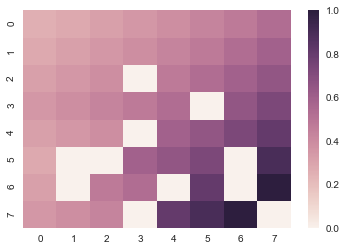

In [43]:
#c- Value Function Color Plot - Policy Iteration 
print_value_function(optimal_value)

In [44]:
#d - Value Iteration
env.reset()
start = time.time()
optimal_value, iter_count = value_iteration(env, gamma, max_iterations, tolerance)
end = time.time()
print("{0:.5f}".format(end - start) + ' s;', iter_count, 'value iteration steps;')

0.00902 s; 64 value iteration steps;


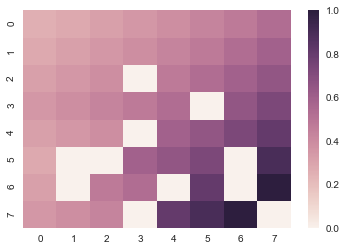

In [45]:
#e - Value Function Color Plot - Value Iteration 
print_value_function(optimal_value)

Value Iteration was faster at 0.00702s, and required 64 iterations. Policy Iteration was slower at 0.03909s, and also required 64 iterations - 59 from policy evaluation and 5 from policy improvement. The value functions for policy and value iteration appear to be the same. 

In [46]:
#h - Optimal Policy using Value Iteration

#Extract optimal policy function
optimal_policy_func = value_function_to_policy(env, gamma, optimal_value)

#Using policy improvement on optimal value function to get optimal policy
optimal_policy = improve_policy(env, gamma, optimal_value, optimal_policy_func)

#Print policy map 
optimal_policy = print_policy(optimal_policy_func, lake_envs.action_names)

[['D' 'D' 'D' 'D' 'D' 'D' 'D' 'D']
 ['D' 'D' 'D' 'R' 'D' 'D' 'D' 'D']
 ['D' 'D' 'D' 'L' 'D' 'R' 'D' 'D']
 ['R' 'R' 'R' 'R' 'D' 'L' 'D' 'D']
 ['R' 'R' 'U' 'L' 'D' 'D' 'R' 'D']
 ['D' 'L' 'L' 'R' 'R' 'D' 'L' 'D']
 ['D' 'L' 'R' 'U' 'L' 'D' 'L' 'D']
 ['R' 'R' 'U' 'L' 'R' 'R' 'R' 'L']]


In [47]:
#i - Agent Executing Optimal Policy 
execute_policy(env, gamma, optimal_policy_func)
print('This makes sense because the agent does not received any reward until the final step, which is discounted. Furthermore, the numbers are different because we are only considering cumulative reward and not state value in this case.')

Total discounted cumulative reward:  0.254186582833
This makes sense because the agent does not received any reward until the final step, which is discounted. Furthermore, the numbers are different because we are only considering cumulative reward and not state value in this case.


**Value Iteration - Stochastic 4x4 Frozen Lake** 

In [48]:
#a - Value Iteration
env = gym.make('Stochastic-4x4-FrozenLake-v0')
env.reset()

start = time.time()
optimal_value, iter_count = value_iteration(env, gamma, max_iterations, tolerance)
end = time.time()
print("{0:.5f}".format(end - start) + ' s;', iter_count, 'value iteration steps;')

[2017-12-16 20:55:34,240] Making new env: Stochastic-4x4-FrozenLake-v0


0.00552 s; 16 value iteration steps;


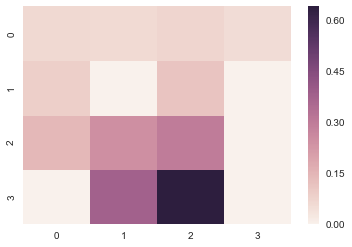

In [49]:
#b - Value Function Color Plot - Value Iteration 
print_value_function(optimal_value)

In [50]:
#c - Optimal Policy using Value Iteration

#Extract optimal policy function
optimal_policy_func = value_function_to_policy(env, gamma, optimal_value)

#Using policy improvement on optimal value function to get optimal policy
optimal_policy = improve_policy(env, gamma, optimal_value, optimal_policy_func)

#Print policy map 
optimal_policy = print_policy(optimal_policy_func, lake_envs.action_names)

[['L' 'U' 'L' 'U']
 ['L' 'L' 'L' 'L']
 ['U' 'D' 'L' 'L']
 ['L' 'R' 'D' 'L']]


**d**: For being in some state s, the environment dynamics differ, which will affect what the optimal action is. For example, in the deterministic case, when choosing to go up, the agent will go up with 1.0 probability. However, in the stochastic case, choosing up allows for a 2/3 chance of going left or right.  

In [51]:
#e - Agent Executing Optimal Policy 
execute_policy(env, gamma, optimal_policy_func)

Total discounted cumulative reward:  0.135085171767


**Contraction Mapping Theorem and Bellman Optimality Math Problems**


**a):** Prove that V* is a unique fixed point of F*, i.e. F*V* = V* and that if F*V = V and F*V'=V' for two value functions V,V' in the set of real numbers, then V = V', i.e., V(s) = V'(s) for all states s.

**Rough Proof**:
Assume V and V' are distinct value functions. Therefore, the fixed points V* and V'* are distinct. This is the same as saying the following: 0 < distance(V*,V'*) = distance(F*V*, F*V'*) <= c*distance(V*,V'*). However, because c = (0,1), distance(V*,V'*) <= c*distance(V*,V'*) is false. Therefore, the assumption is wrong and we have a contradiction. The only case for which this is true is when distance(V*,V'*) = 0. Therefore, V* = V'* and V* is a unique fixed point of F*. 

**b):** Prove that F*^k(Vo) converges to V* as k goes to infinity.

**Rough Proof**:
Basically, you can use the knowledge that a sequence of value functions {Vk} is Cauchy in R^s and has a limit V* as k goes to infinity. Since F* is continuous, then F*V = F lim(V_k) as k --> infinity = lim (F V_k) as k --> infinity = lim (V k+1) as k --> infinity = V*. 

**c):** For some optimal value function V*, write down policy extraction. 

**Answer**: optimal policy = maximal action value over all action values from  s to s', where V*(s') gives the optimal value for the next state. 